**Выбор метрик** 

Здесь all_users - количество юзеров, которые попали в данный бакет. 

1) **value_by_user = metric_value / users** - сумма целевых действий в расчете на пользователя, совершавшего целевое действие. 

2) **visits_by_user = visits / users** - количество целевых сессий в расчете на пользователя, совершавшего целелвое действие.

3) **visits_percentage = visits / (visits + churn_visits)** - доля целевых сессий.

4) **users_percentage = users / all_users** - доля пользователей, совершавших целевое действие в рамках бакета.

5) **churn_users_percentage = churn_users / all_users** - доля пользователей, отказавшихся от оформления заказа в рамках бакета.

В рамках данного эксперимента позитивными последсвтиями нововведений можно считать рост метрик value_by_user, visits_by_user, visits_percentage, users_percentage и снижение значения метрики churn_users_percentage.


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [ ]:
by_bucket = pd.read_csv("hw_abt_2_bybucket.csv", sep="\t")
by_users = pd.read_csv("hw_abt_2_byuser.csv", sep="\t")

In [ ]:
all_users = [by_users[by_users.group_id == i].count()[0] for i in range(1, 17)]

In [ ]:
by_bucket["all_users"] = all_users
by_bucket["value_by_user"] = by_bucket.metric_value / by_bucket.users
by_bucket["visits_by_user"] = by_bucket.visits / by_bucket.users
by_bucket["visits_percentage"] = by_bucket.visits / (by_bucket.visits + by_bucket.churn_visits)
by_bucket["users_percentage"] = by_bucket.users / by_bucket.all_users
by_bucket["churn_users_percentage"] = by_bucket.churn_users / by_bucket.all_users
metrics = ["value_by_user", "visits_by_user", "visits_percentage", "users_percentage", "churn_users_percentage"]

**Проверка на нормальность**

Для проверки распределений на нормальность будем использовать критерий Шапиро-Уилка. Нам необходима именно нормальность распределения, а его мощность больше мощности критерия Колмогорова - Смирнова.


**Проверка на нормальность распределений метрик для контрольной группы**

In [ ]:
alpha = 0.05
data_control = by_bucket.loc[:7]
for i in metrics:
  x = stats.shapiro(data_control[i])
  print(("Distributions of " + i + " is {}normal\n").format( {True:'not ', False:''}[x[1] < alpha]))

Distributions of value_by_user is not normal

Distributions of visits_by_user is normal

Distributions of visits_percentage is normal

Distributions of users_percentage is not normal

Distributions of churn_users_percentage is not normal



**Построение гистограмм распределений метрик для контрольной группы**

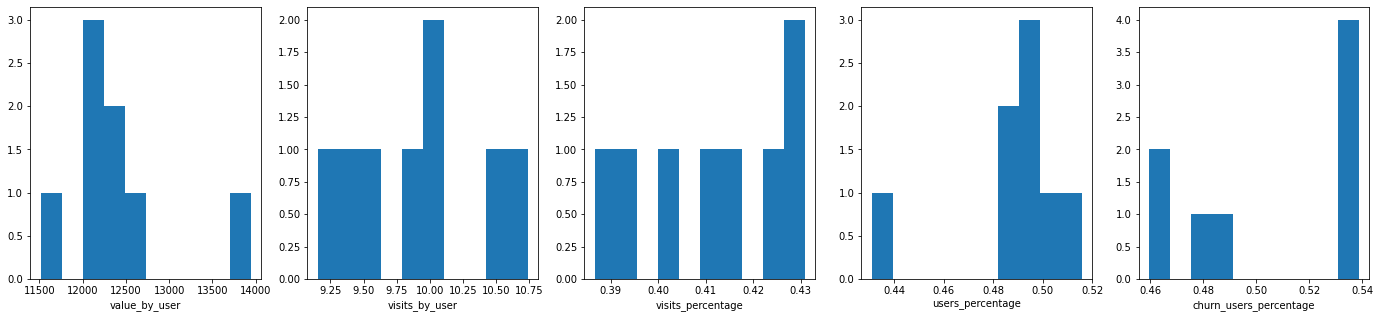

In [ ]:
fig = plt.figure(figsize=(24, 5))

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.hist(data_control["value_by_user"])
ax2.hist(data_control["visits_by_user"])
ax3.hist(data_control["visits_percentage"])
ax4.hist(data_control["users_percentage"])
ax5.hist(data_control["churn_users_percentage"])

ax1.set_xlabel("value_by_user")
ax2.set_xlabel("visits_by_user")
ax3.set_xlabel("visits_percentage")
ax4.set_xlabel("users_percentage")
ax5.set_xlabel("churn_users_percentage")

plt.show()

**Построение диаграмм размаха для метрик в контрольной группе**

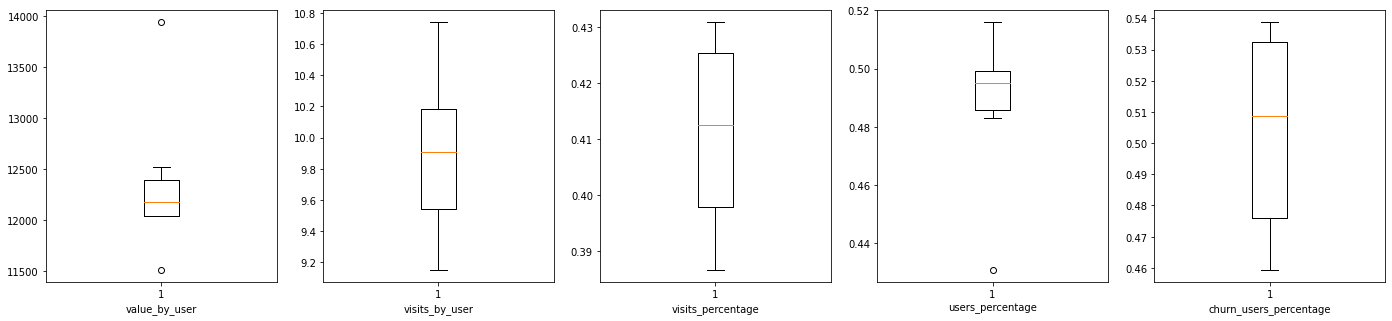

In [ ]:
fig = plt.figure(figsize=(24, 5))

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.boxplot(data_control["value_by_user"])
ax2.boxplot(data_control["visits_by_user"])
ax3.boxplot(data_control["visits_percentage"])
ax4.boxplot(data_control["users_percentage"])
ax5.boxplot(data_control["churn_users_percentage"])

ax1.set_xlabel("value_by_user")
ax2.set_xlabel("visits_by_user")
ax3.set_xlabel("visits_percentage")
ax4.set_xlabel("users_percentage")
ax5.set_xlabel("churn_users_percentage")

plt.show()

**Проверка на нормальность распределений метрик для экпериментальной группы**

In [ ]:
alpha = 0.05
data_exp = by_bucket.loc[8:]
for i in metrics:
  x = stats.shapiro(data_exp[i])
  print(("Distributions of " + i + " is {}normal\n").format( {True:'not ', False:''}[x[1] < alpha]))

Distributions of value_by_user is normal

Distributions of visits_by_user is normal

Distributions of visits_percentage is normal

Distributions of users_percentage is normal

Distributions of churn_users_percentage is normal



**Построение гистограмм распределений метрик для экспериментальной группы**

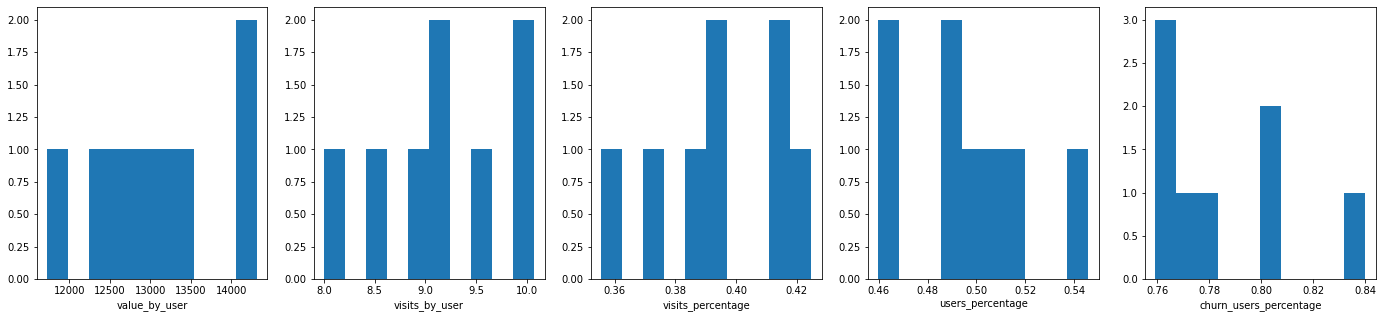

In [ ]:
fig = plt.figure(figsize=(24, 5))

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.hist(data_exp["value_by_user"])
ax2.hist(data_exp["visits_by_user"])
ax3.hist(data_exp["visits_percentage"])
ax4.hist(data_exp["users_percentage"])
ax5.hist(data_exp["churn_users_percentage"])

ax1.set_xlabel("value_by_user")
ax2.set_xlabel("visits_by_user")
ax3.set_xlabel("visits_percentage")
ax4.set_xlabel("users_percentage")
ax5.set_xlabel("churn_users_percentage")

plt.show()

**Построение диаграмм размаха для метрик в экспериментальной группе**

Text(0.5, 0, 'churn_users_percentage')

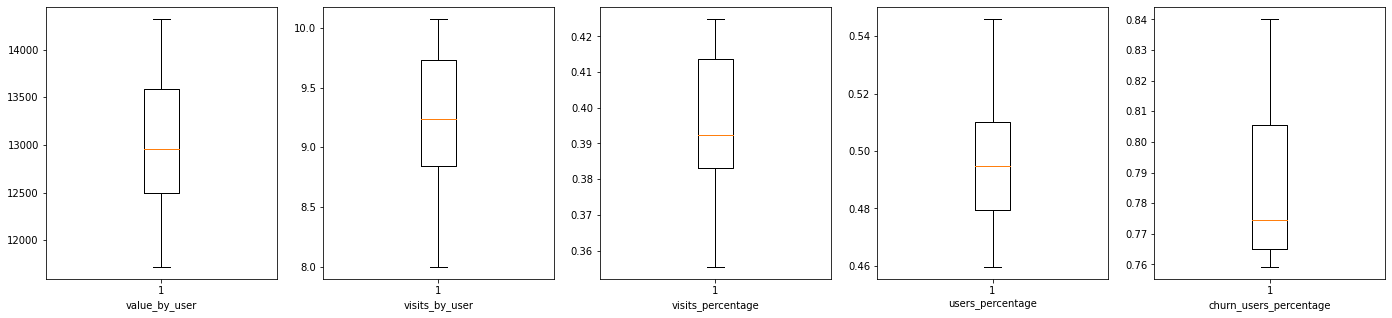

In [ ]:
fig = plt.figure(figsize=(24, 5))

ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.boxplot(data_exp["value_by_user"])
ax2.boxplot(data_exp["visits_by_user"])
ax3.boxplot(data_exp["visits_percentage"])
ax4.boxplot(data_exp["users_percentage"])
ax5.boxplot(data_exp["churn_users_percentage"])

ax1.set_xlabel("value_by_user")
ax2.set_xlabel("visits_by_user")
ax3.set_xlabel("visits_percentage")
ax4.set_xlabel("users_percentage")
ax5.set_xlabel("churn_users_percentage")

Итак, было установлено, что в случае экспериментальной группы можно говорить о нормальности распределений метрик. Однако не про все метрики контрольной группы можно говорить то же самое. Так, лишь только метрики visits_by_user и visits_percentage являются нормально распределенными в данной группе.

**Дисперсионный анализ**

Как было установленно, говорить о нормальности можно лишь только для метрик visits_by_user и visits_percentage. Для данных метрик применим более мощный критерий Фишера. Для остальных же будем применять менее чувствительный к отклонениям от нормальности критерий Левена.

In [ ]:
alpha = 0.05 
x1 = stats.f_oneway(data_control["visits_by_user"], data_exp["visits_by_user"])[1] 
x2 = stats.f_oneway(data_control["visits_percentage"], data_exp["visits_percentage"])[1] 
x3 = stats.levene(data_control["value_by_user"], data_exp["value_by_user"])[1] 
x4 = stats.levene(data_control["users_percentage"], data_exp["users_percentage"])[1] 
x5 = stats.levene(data_control["churn_users_percentage"], data_exp["churn_users_percentage"])[1] 

print('{} the H0: Var(data_control["value_by_user"]) == Var(data_exp["value_by_user"])\n'.format( {False:'Reject', True:'Confirm'}[x3 > alpha]))
print('{} the H0: Var(data_control["visits_by_user"]) == Var(data_exp["visits_by_user"])\n'.format( {False:'Reject', True:'Confirm'}[x1 > alpha]))
print('{} the H0: Var(data_control["visits_percentage"]) == Var(data_exp["visits_percentage"])\n'.format( {False:'Reject', True:'Confirm'}[x2 > alpha]))
print('{} the H0: Var(data_control["users_percentage"]) == Var(data_exp["users_percentage"])\n'.format( {False:'Reject', True:'Confirm'}[x4 > alpha]))
print('{} the H0: Var(data_control["churn_users_percentage"]) == Var(data_exp["churn_users_percentage"])\n'.format( {False:'Reject', True:'Confirm'}[x5 > alpha]))

Confirm the H0: Var(data_control["value_by_user"]) == Var(data_exp["value_by_user"])

Reject the H0: Var(data_control["visits_by_user"]) == Var(data_exp["visits_by_user"])

Confirm the H0: Var(data_control["visits_percentage"]) == Var(data_exp["visits_percentage"])

Confirm the H0: Var(data_control["users_percentage"]) == Var(data_exp["users_percentage"])

Confirm the H0: Var(data_control["churn_users_percentage"]) == Var(data_exp["churn_users_percentage"])



Таким образом установлена гомегенность дисперсий для всех метрик кроме метрики visits_by_user.

**Проверка статистической значимости (проверка равенства средних)**

Итак, требование нормальности и гомоскедастичности выполняется только для метрики visits_percentage. Для нее используем критерий Стьюдента. Для остальных метрик же используем непараметрический критерий Манна - Уитни.

In [ ]:
alpha = 0.05
x1 = stats.mannwhitneyu(data_control["value_by_user"], data_exp["value_by_user"])[1]
x2 = stats.mannwhitneyu(data_control["visits_by_user"], data_exp["visits_by_user"])[1]
x3 = stats.ttest_ind(data_control["visits_percentage"], data_exp["visits_percentage"])[1]
x4 = stats.mannwhitneyu(data_control["users_percentage"], data_exp["users_percentage"])[1]
x5 = stats.mannwhitneyu(data_control["churn_users_percentage"], data_exp["churn_users_percentage"])[1]

print('Diffs between control and experimental group for value_by_user is {}significant\n'.format({False:'not ', True:''}[x1 < alpha]),\
      "control_mean =", data_control["value_by_user"].mean() ,"exp_mean =", data_exp["value_by_user"].mean()) 
print('Diffs between control and experimental group for visits_by_user is {}significant\n'.format({False:'not ', True:''}[x2 < alpha]),\
      "control_mean =", data_control["visits_by_user"].mean(), "exp_mean =", data_exp["visits_by_user"].mean())  
print('Diffs between control and experimental group for visits_percentage is {}significant\n'.format({False:'not ', True:''}[x3 < alpha]),\
      "control_mean =", data_control["visits_percentage"].mean(), "exp_mean =", data_exp["visits_percentage"].mean())  
print('Diffs between control and experimental group for users_percentage is {}significant\n'.format({False:'not ', True:''}[x4 < alpha]),\
      "control_mean =", data_control["users_percentage"].mean(), "exp_mean =", data_exp["users_percentage"].mean())  
print('Diffs between control and experimental group for churn_users_percentage is {}significant\n'.format({False:'not ', True:''}[x5 < alpha]),\
      "control_mean =", data_control["churn_users_percentage"].mean(), "exp_mean =", data_exp["churn_users_percentage"].mean())  

Diffs between control and experimental group for value_by_user is significant
 control_mean = 12346.467183102735 exp_mean = 13054.717025394619
Diffs between control and experimental group for visits_by_user is significant
 control_mean = 9.912626788526323 exp_mean = 9.19593381963079
Diffs between control and experimental group for visits_percentage is not significant
 control_mean = 0.41089964920322974 exp_mean = 0.39427872505977946
Diffs between control and experimental group for users_percentage is not significant
 control_mean = 0.4883260190854966 exp_mean = 0.4954266134438846
Diffs between control and experimental group for churn_users_percentage is significant
 control_mean = 0.503178523533048 exp_mean = 0.7859169445065535


Было установлено, что изменения для экспериментальной группы значительно повлияли на метрики value_by_user, visits_by_user, churn_users_percentage. Как видно из данных, благодаря нововведениям значительно выросла метрика суммы целевых действий в расчете на целевого пользователя (value_by_user). Однако, нововведения снизили количество целевых действий на целевого пользователя (visits_by_user) и повысили долю пользователей, которые отказались делать заказ (churn_users_percentage). На метрики visits_percentage и users_percentage обновление не оказало значительного влияния. 

**Анализ размера выборки**

В нашем случае элементами выборки будут являться группы (бакеты) примерно по 310 человек. Тогда размер генеральной совокупности примерно равен 1 500 000 / 310 = 485. Для анализа нашего эксперимента было отобрано 2 множества по 8 групп в каждой.

Рассмотрим, например, метрику visits_percentage, различия для которой мы анализровали с помощью критерия Стьюдента. Мы хотим добиться различий Δ таких, что F(x > Δ) = 0.05, где F - функция распредления для распредления Стьюдента с 8-ми степенями свободы. Отсюда получим Δ = 1.86. Пусть α = 0.05, а мощность теста - 0.8. 

In [ ]:
import statsmodels.stats.power
effect = 1.86
alpha = 0.05
power = 0.8
result = statsmodels.stats.power.TTestIndPower().solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result) 

Sample Size: 5.679


Получаем, что объем выборки должен быть около 6, что выполняется в нашем тесте.

**Рекомендации менеджеру**

Как показал эксперимент, нововведения положительно сказались на совершении "дорогих" целевых действий. Хотя и снизилось количество целевых действий на целевого пользователя, но каждый из них в среднем стал приносить больше прибыли. С другой стороны, больше пользователей стали уходить в отток. Таким образом, юзеры, которых удалось заинтересовать сервисом, стали пользоваться им более целенаправлено и осмысленно. Однако, заинтересовать пользователя стало сложнее, так как больше людей стали уходить в отток. Подводя итоги, изменения носят положительный эффект, если нашей задачей является удержание накопленной аудитории и отрицательной, если мы хотим привлекать новых юзеров.